In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:/remote/datasets/clustering/customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<h2> Tentukan jumlah cluster

In [3]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

  0%|          | 0/8 [00:00<?, ?it/s]

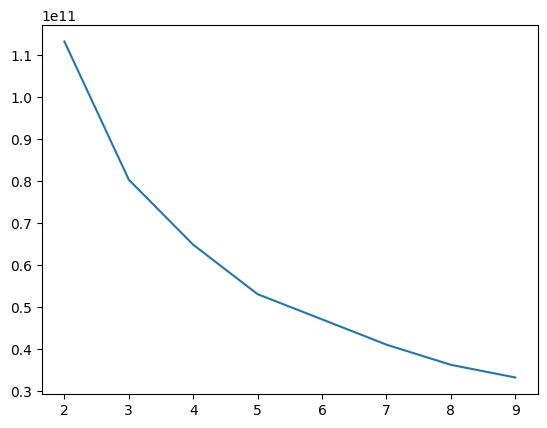

In [4]:
score = []
for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k)
    member = model.fit(df, categorical=[0, 1])
    score.append(model.cost_)
plt.plot(range(2, 10), score)

<h3> Training

In [5]:
model = KPrototypes(n_clusters=3)
member = model.fit(df, categorical=[0, 1]) # 0, 1 are categorical columns

In [7]:
df_pred = df.copy()
df_pred["cluster"] = member.labels_
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


<h3> Analyze Cluster

In [19]:
# make dataframe seperate by num and cat columns, dataframe contains centroids
df_centroids = pd.DataFrame(member.cluster_centroids_)
df_centroids.columns = df.columns
df_centroids

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667,1.0,3.0
1,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000,2.0,3.0
2,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970,1.0,3.0


In [17]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

rata-rata mencerminkan centroid pada masing-masing kolom

<Axes: xlabel='cluster'>

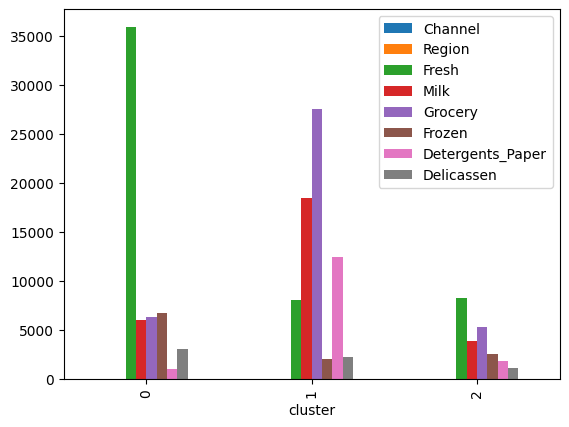

In [15]:
# analyze cluster
df_pred.groupby("cluster").mean()
df_pred.groupby("cluster").mean().plot.bar()

* cluster 0 : customer yang suka fresh food
* cluster 1 : typical orang yang belanja milk, grocery, dan detergent
* cluster 3 : orang hemat